# Catalog Querying

## Querying Objects with Astroquery - Simbad and NED

### Simbad

Here we will look at querying catalogs in Python within your code, using a package called "astroquery" Astroquery allows you to query many popular astronomical catalogs, along with querying web-based astronomy websites like Simbad, NED, Vizier, etc.

As an example, below we will query a source in Simbad

In [1]:
from astroquery.simbad import Simbad

#query object in Simbad
barnard = Simbad.query_object("Barnard's star")

In [2]:
barnard.show_in_notebook(display_length=10)

idx,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
0,NAME Barnard's star,17 57 48.4997,+04 41 36.111,14,14,0.223,0.304,90,A,O,2018yCat.1345....0G


Also, we can search around Barnard's star in Simbad to see what else may be there:

In [3]:
from astropy import coordinates
import astropy.units as u

#right ascension of Barnard's Star
ra=barnard['RA'][0]

#declination of barnard's star
dec=barnard['DEC'][0]

#creat Astropy coordinate object
c = coordinates.SkyCoord(ra+' '+dec, frame='icrs', unit=(u.hourangle, u.deg))

#radius to search around barnard's star
r = 30 * u.arcminute

#Query around some coordinates (RA,DEC) in Simbad
barnard_query = Simbad.query_region(c, radius=r)

In [4]:
barnard_query.show_in_notebook(display_length=10)

idx,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
0,NAME Barnard's star,17 57 48.4997,+04 41 36.111,14,14,0.223,0.304,90,A,O,2018yCat.1345....0G
1,NAME Barnard's Star b,17 57 48.4997,+04 41 36.111,14,14,0.223,0.304,90,A,O,2018yCat.1345....0G
2,TYC 425-262-1,17 57 51.9500,+04 42 20.199,14,14,0.041,0.054,90,A,O,2018yCat.1345....0G
3,1RXS J175749.5+043955,17 57 49.505,+04 39 55.01,7,7,--,--,0,E,,2000IAUC.7432R...1V
4,V* V3215 Oph,17 57 42.3283,+04 39 07.871,14,14,0.045,0.047,90,A,O,2018yCat.1345....0G
5,2MASX J17574690+0437041,17 57 46.8833,+04 37 04.640,14,14,3.913,3.802,90,C,O,2018yCat.1345....0G
6,[SHM2017] J269.45533+04.60506,17 57 49.2807,+04 36 18.160,14,14,0.119,0.126,90,A,O,2018yCat.1345....0G
7,LEDA 201460,17 58 09.9,+04 40 28,5,5,15000.000,15000.000,90,D,,1996PASJ...48..679R
8,V* V391 Oph,17 58 09.1304,+04 39 27.610,14,14,0.042,0.052,90,A,O,2018yCat.1345....0G


### NED

This form of having an astroquery object (in the above case "Simbad") and applying searches to it (i.e. through the calls "query_object()" or "query_region()") is consistent throughout the astroquery framework. So, while this is a stellar example above, you can also apply this same framework with NED, for example, to search for extra-galactic objects:

In [5]:
from astroquery.ned import Ned

#query NED to get info on M1
M1 = Ned.query_object("M1")

M1.show_in_notebook()

idx,No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,,degrees,degrees,,km / s,,,,arcmin,,,,,,,
0,1,MESSIER 001,83.63321,22.01446,SNR,--,--,,,--,139,2,61,21,0,2,0


With NED, you can even download image data from the object:

In [6]:
#get all available images of M1 from NED
images = Ned.get_images("M1")

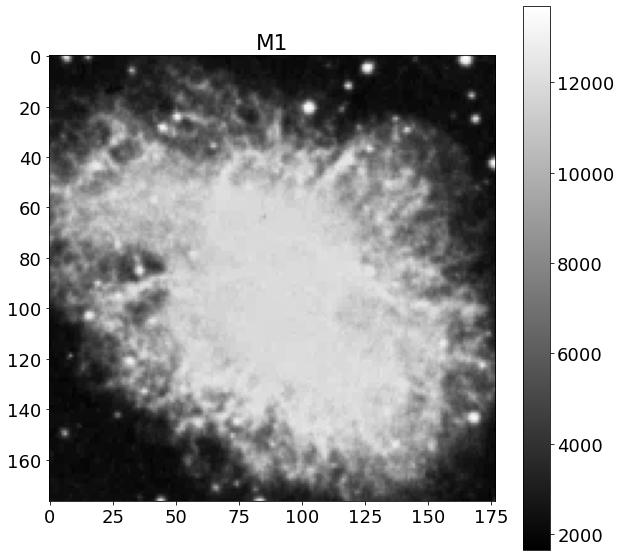

In [7]:
import matplotlib.pylab as plt
%matplotlib inline

#plot the first image
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,10))
plt.imshow(images[0][0].data, cmap='gray')
plt.title('M1')
plt.colorbar()
plt.show()

## Querying Catalogs with Astroquery - Vizier and Gaia

### Vizier (Basics)

But, what if there is a specific catalog we want to query that is not clearly available on the above list? You can do that with any catalog that is available in Vizier! There are a few ways to do this. First, you can just search for a catalog in Vizier, just like you would in the browser. Lets try to find SDSS DR12:

In [8]:
from astroquery.vizier import Vizier

#Search for catalogs in Vizier
catalog_list = Vizier.find_catalogs('SDSS DR12')

In [9]:
for k,v in catalog_list.items():
    print(k,v.description)

V/147 The SDSS Photometric Catalogue, Release 12 (Alam+, 2015)
J/ApJ/807/178 Newly rich galaxy clusters identified in SDSS-DR12 (Wen+, 2015)
J/ApJ/835/161 A cosmic void catalog of SDSS DR12 BOSS galaxies (Mao+, 2017)
J/ApJS/225/23 Compact groups of galaxies from SDSS-DR12 (MLCG) (Sohn+, 2016)
J/ApJS/228/9 Physical parameters of ~300000 SDSS-DR12 QSOs (Kozlowski, 2017)
J/ApJS/229/39 Narrow line Seyfert 1 galaxies from SDSS-DR12 (Rakshit+, 2017)
J/A+A/583/A86 DB white dwarfs in SDSS DR10 and DR12 (Koester+, 2015)
J/A+A/596/A14 Group catalogues of the local universe (Saulder+, 2016)
J/MNRAS/452/4153 SDSS DR12 QSOs [OIII] doublet (Albareti+, 2015)
J/MNRAS/455/3413 New white dwarf and subdwarf stars in SDSS DR12 (Kepler+, 2016)
J/MNRAS/469/2102 White dwarf population from the SDSS DR12 (Anguiano+, 2017)


From above, we now know what the catalog ID is in Vizier for SDSS DR12 (its the first key in the list). As a note, you can also get this from Vizier in your browser. Now we can start to query the SDSS DR12 catalog. First, lets just pull out the first 1000 rows from the catalog:

In [10]:
#set the row limit for Vizier output (as a note, -1 is no limit to get entire catalog)
Vizier.ROW_LIMIT = 1000

#turn keys into list
catalog_keys=list(catalog_list.keys())

#Get Vizier catalog that matches key
sdss_dr12=Vizier.get_catalogs(catalog_keys[0])

In [11]:
sdss_dr12

TableList with 1 tables:
	'0:V/147/sdss12' with 23 column(s) and 1000 row(s) 

In [12]:
sdss_dr12[0].show_in_notebook(display_length=10)

idx,RA_ICRS,DE_ICRS,mode,q_mode,class,SDSS12,m_SDSS12,ObsDate,Q,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,zsp,zph,e_zph,__zph_
,deg,deg,,,,,,yr,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,,
0,160.251899,54.054902,1,,3,J104100.45+540317.6,*,2001.8878,3,22.916,0.894,19.983,0.028,18.741,0.017,18.228,0.015,17.806,0.035,--,0.2144,0.0357,0.2193
1,160.253796,54.059729,1,+,3,J104100.91+540335.0,,2001.8878,3,25.296,0.886,23.565,0.277,22.425,0.193,21.941,0.159,22.362,0.643,--,0.2436,0.1407,0.3248
2,160.247233,54.057002,1,+,3,J104059.33+540325.2,,2001.8878,3,23.391,0.915,21.589,0.078,20.555,0.055,20.243,0.057,20.110,0.199,--,0.3338,0.1114,0.3150
3,160.253860,54.061665,1,,3,J104100.92+540341.9,,2001.8878,3,22.885,0.486,22.897,0.182,22.899,0.329,23.139,0.499,22.265,0.724,--,0.6170,0.1507,0.4041
4,160.268008,54.057446,1,+,6,J104104.32+540326.8,,2001.9670,3,23.591,0.747,25.120,0.715,22.069,0.156,20.274,0.048,19.080,0.057,--,--,--,--
5,160.275714,54.061324,2,,3,J104106.17+540340.7,,2001.9670,3,23.611,1.416,21.477,0.105,20.866,0.100,20.713,0.133,22.027,1.292,--,--,--,--
6,160.275672,54.061309,1,,3,J104106.16+540340.7,*,2001.8878,3,24.456,1.456,21.913,0.097,21.479,0.116,21.208,0.127,20.943,0.358,--,0.2329,0.1233,0.2090
7,160.273109,54.061564,1,+,3,J104105.54+540341.6,,2001.8878,3,24.053,1.052,22.330,0.112,21.882,0.136,21.608,0.139,21.728,0.534,--,0.2809,0.0746,0.1883
8,160.273022,54.061601,2,,3,J104105.52+540341.7,,2001.9670,3,23.715,1.078,21.925,0.113,21.533,0.131,22.942,0.681,21.036,0.440,--,--,--,--


<b>ASIDE!!!</b>

What if you want to load the above table into a latex manuscript? Well, with astropy tables, it is very easy to ouput your table as a basic latex table. An example of this is shown below:

In [13]:
from astropy.io import ascii

ascii.write(sdss_dr12[0][:10][['RA_ICRS','DE_ICRS','SDSS12','umag','gmag','rmag','imag','zmag']], format='latex')  

\begin{table}
\begin{tabular}{cccccccc}
RA_ICRS & DE_ICRS & SDSS12 & umag & gmag & rmag & imag & zmag \\
$\mathrm{deg}$ & $\mathrm{deg}$ &  & $\mathrm{mag}$ & $\mathrm{mag}$ & $\mathrm{mag}$ & $\mathrm{mag}$ & $\mathrm{mag}$ \\
160.251899 & 54.054902 & J104100.45+540317.6 & 22.916 & 19.983 & 18.741 & 18.228 & 17.806 \\
160.253796 & 54.059729 & J104100.91+540335.0 & 25.296 & 23.565 & 22.425 & 21.941 & 22.362 \\
160.247233 & 54.057002 & J104059.33+540325.2 & 23.391 & 21.589 & 20.555 & 20.243 & 20.110 \\
160.253860 & 54.061665 & J104100.92+540341.9 & 22.885 & 22.897 & 22.899 & 23.139 & 22.265 \\
160.268008 & 54.057446 & J104104.32+540326.8 & 23.591 & 25.120 & 22.069 & 20.274 & 19.080 \\
160.275714 & 54.061324 & J104106.17+540340.7 & 23.611 & 21.477 & 20.866 & 20.713 & 22.027 \\
160.275672 & 54.061309 & J104106.16+540340.7 & 24.456 & 21.913 & 21.479 & 21.208 & 20.943 \\
160.273109 & 54.061564 & J104105.54+540341.6 & 24.053 & 22.330 & 21.882 & 21.608 & 21.728 \\
160.273022 & 54.061601 & J10

<b>NOW BACK TO CATALOG QUERYING!!!</b>

We can also query around something, like Barnard's star, again:

In [14]:
sdss_bar = Vizier.query_region("Barnard's star", radius=30/60*u.deg, catalog=catalog_keys[0])

### Gaia (Advanced)

Now lets get a little more advanced. For those who may not be familiar, astornomy databases have a form of SQL that you can use to query catalogs. This is called ADQL, and for people who have been on the Gaia archive, you can use this to query Gaia. This is also the query language used for TAP Vizier (a more advanced version of Vizier, I'd recommend to check that out if you find yourself using Vizier a lot). An overview of this querying language is probably beyond the scope of this, but if you are interested you should look at: https://gea.esac.esa.int/archive-help/adql/index.html

But, you can use this with astroquery, which can make your database queries very powerful. Below is an example with Gaia

In [15]:
from astroquery.gaia import Gaia

#ADQL query
query_str="""SELECT TOP 1000 gaia.source_id, gaia.ra, gaia.dec, gaia.parallax, gaia.parallax_error,
gaia.pmra, gaia.pmdec, gaia.phot_g_mean_mag, gaia.phot_bp_mean_mag, gaia.phot_rp_mean_mag, gaia.radial_velocity
FROM gaiadr2.gaia_source as gaia \
WHERE gaia.parallax>= 40 and gaia.parallax_error/gaia.parallax<0.1 and gaia.phot_bp_mean_mag-gaia.phot_rp_mean_mag>2."""

#you have to login to use Gaia query, create account via Gaia archive
#my login is stored in a file where first line is username and second is password
Gaia.login(credentials_file='my_credentials_file.txt')

#star the query
job = Gaia.launch_job(query_str)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
OK


In [16]:
#get the results from the query
gaia_25 = job.get_results()

In [17]:
gaia_25.show_in_notebook(display_length=10)

idx,source_id,ra,dec,parallax,parallax_error,pmra,pmdec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,radial_velocity
,,deg,deg,mas,mas,mas / yr,mas / yr,mag,mag,mag,km / s
0,4930524225613187456,22.155066229172633,-47.904372028388906,40.009180146165036,0.04541962286268977,115.82777755136883,-187.521217346607,12.906946,14.314684,11.755677,16.487838544392897
1,6523442177391039360,354.06529161866865,-48.5836375173715,40.00918241654925,0.11707332870777751,-132.31794078656412,-23.201176850240607,10.998973,12.597145,9.81949,--
2,3936753661871508096,198.85870406515312,16.24920057652639,40.01509991722628,0.048816428584610556,164.5211860657761,-681.7017404292981,12.9392185,14.321246,11.78781,--
3,3649114960414008064,217.76730789022102,-3.121304109119161,40.015494998635994,0.08364660795175086,-332.86138187872575,12.721130047392561,13.326727,15.105947,12.042837,--
4,4672963867324468608,55.745502316384574,-64.13597761963291,40.016690342973284,0.04879312384282268,642.4367246184796,-843.2877410804716,14.429506,16.287508,13.137935,--
5,3758803507415614080,165.85627625468135,-9.853698591862821,40.017814576745856,0.11115606577299385,128.48716507393866,-187.0986677551082,12.563701,14.052653,11.379734,--
6,1638426776706401920,261.26992229694343,69.5957572470048,40.02018885856297,0.06819369763890958,-107.37679999070966,224.04591903675956,14.411258,16.360931,13.089838,--
7,5541659279700994944,123.81601095598784,-36.01372302301912,40.02020810889608,0.04584348930945529,-112.56739222820683,613.5258861635659,13.849855,15.605308,12.583446,--
8,5344443383724940416,176.8410255469797,-54.41172517719628,40.0228404572595,0.25741902811179623,-158.58115315691649,-155.8944244538219,15.959789,18.582497,14.497498,--


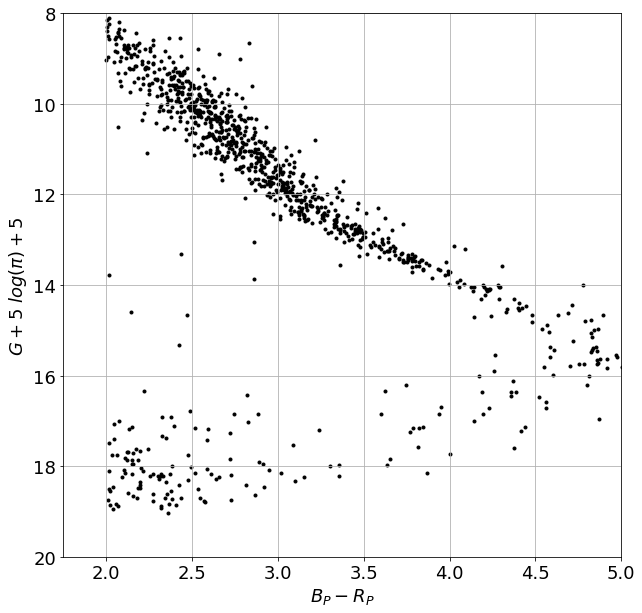

In [18]:
import numpy as np

plt.figure(figsize=(10,10))
plt.scatter(gaia_25['phot_bp_mean_mag']- gaia_25['phot_rp_mean_mag'],
           gaia_25['phot_g_mean_mag']+5*np.log10(gaia_25['parallax']*1e-3)+5,c='k',marker='.')
plt.grid()
plt.xlim((1.75,5))
plt.ylim((8,20))
plt.xlabel(r'$B_P-R_P$')
plt.ylabel(r'$G+5\ log(\pi)+5$')
plt.gca().invert_yaxis()
plt.show()

In [19]:
#ADQL query
query_str="""SELECT TOP 1000 gaia.source_id, gaia.ra, gaia.dec, gaia.parallax, gaia.parallax_error,
gaia.pmra, gaia.pmdec, gaia.phot_g_mean_mag, gaia.phot_bp_mean_mag, gaia.phot_rp_mean_mag, gaia.radial_velocity,
gaiadr1.tmass_original_valid. tmass_oid, gaiadr1.tmass_original_valid.ra, gaiadr1.tmass_original_valid.dec, 
gaiadr1.tmass_original_valid.j_m, gaiadr1.tmass_original_valid.h_m, gaiadr1.tmass_original_valid.ks_m
FROM gaiadr2.gaia_source as gaia \
JOIN gaiadr2.tmass_best_neighbour using (source_id) \
JOIN gaiadr1.tmass_original_valid using (tmass_oid) \
WHERE gaia.parallax>= 40 and gaia.parallax_error/gaia.parallax<0.1 and gaia.phot_bp_mean_mag-gaia.phot_rp_mean_mag>2."""

#start the query
job = Gaia.launch_job(query_str)

#get the results of the query
gaia_2mass = job.get_results()

gaia_2mass.show_in_notebook(display_length=10)

idx,source_id,ra,dec,parallax,parallax_error,pmra,pmdec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,radial_velocity,tmass_oid,ra_2,dec_2,j_m,h_m,ks_m
,,deg,deg,mas,mas,mas / yr,mas / yr,mag,mag,mag,km / s,,deg,deg,mag,mag,mag
0,4930524225613187456,22.155066229172633,-47.904372028388906,40.009180146165036,0.04541962286268977,115.82777755136883,-187.521217346607,12.906946,14.314684,11.755677,16.487838544392897,102942609,22.154256,-47.903542,10.21,9.64,9.384
1,6523442177391039360,354.06529161866865,-48.5836375173715,40.00918241654925,0.11707332870777751,-132.31794078656412,-23.201176850240607,10.998973,12.597145,9.81949,--,99974435,354.066148,-48.583515,8.072,7.429,7.188
2,3936753661871508096,198.85870406515312,16.24920057652639,40.01509991722628,0.048816428584610556,164.5211860657761,-681.7017404292981,12.9392185,14.321246,11.78781,--,341795625,198.857989,16.252144,10.233,9.717,9.443
3,3649114960414008064,217.76730789022102,-3.121304109119161,40.015494998635994,0.08364660795175086,-332.86138187872575,12.721130047392561,13.326727,15.105947,12.042837,--,283220694,217.768794,-3.121394,10.212,9.608,9.327
4,4672963867324468608,55.745502316384574,-64.13597761963291,40.016690342973284,0.04879312384282268,642.4367246184796,-843.2877410804716,14.429506,16.287508,13.137935,--,27035151,55.739108,-64.132317,11.318,10.886,10.579
5,3758803507415614080,165.85627625468135,-9.853698591862821,40.017814576745856,0.11115606577299385,128.48716507393866,-187.0986677551082,12.563701,14.052653,11.379734,--,260756892,165.855712,-9.852842,9.785,9.147,8.906
6,1638426776706401920,261.26992229694343,69.5957572470048,40.02018885856297,0.06819369763890958,-107.37679999070966,224.04591903675956,14.411258,16.360931,13.089838,--,464850901,261.271349,69.594749,11.115,10.501,10.182
7,5541659279700994944,123.81601095598784,-36.01372302301912,40.02020810889608,0.04584348930945529,-112.56739222820683,613.5258861635659,13.849855,15.605308,12.583446,--,152870753,123.816636,-36.016529,10.736,10.174,9.881
8,5344443383724940416,176.8410255469797,-54.41172517719628,40.0228404572595,0.25741902811179623,-158.58115315691649,-155.8944244538219,15.959789,18.582497,14.497498,--,73551250,176.842196,-54.411057,12.074,11.435,11.018


In [20]:
from astropy.io import ascii

ascii.write(gaia_25, 'gaia_25.csv', format='csv', fast_writer=False)  
ascii.write(gaia_2mass, 'gaia_2mass.csv', format='csv', fast_writer=False)  

In [21]:
#logout of Gaia account
Gaia.logout()